<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/JupyterNotebooks/TravelingWaveConvection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diffusion and Convection in 1D

### Burger's Equation

\begin{equation}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} - \nu \frac{\partial^2 u}{\partial x^2} = 0
\end{equation}

where $\nu$ is the viscosity.  As in the previous examples, we use the forward difference for the time derivative, the backward difference for the spatial first derivative, and the central difference for the spatial second derivative.

\begin{equation}
\frac{u_i^{n+1} -  u_i^n}{\Delta t} + u^n_i \left( \frac{u^n_{i} - u^n_{i-1}}{\Delta x} \right) - \nu \left( \frac{u^n_{i+1} - 2 u^n_i + u^n_{i-1}}{\Delta x^2} \right) = 0
\end{equation}

\begin{equation}
u_i^{n+1} =  u_i^n - \frac{\Delta t}{\Delta x} u_i^n \left( u^n_{i} - u^n_{i-1} \right) + \frac{\nu \Delta t}{\Delta x^2} \left( u^n_{i+1} - 2 u^n_i + u^n_{i-1} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [3]:
# We define the x-axis to start at x=0.0m and end at x=2*Pi.
# 
# We specify the number of steps in x (nx), and the number
# of steps in t (nt), and calculate dx and dt based on these choices.

xrange = 2*numpy.pi
trange = 0.5
nx = 401
dx = xrange / (nx-1)
nt = 390    #nt is the number of timesteps we want to calculate
dt = trange / (nt-1)


viscosity = 0.07

# Courant condition
#dt = dx * viscosity  
#trange = nt*dt

print ("First stability constant = %0.4f" % (dt/dx))
print ("Second stability constant = %0.4f" % (viscosity*dt/dx**2))

# stability for dt/dx <= 1/2 ?
dt_max = 1.0/2.0*dx
nt_min1 = trange/dt_max+1
print ("First Term Minimum number of timesteps = %0.0f" % nt_min1)

# stability for viscosity*dt/dx**2 <= 1/3 ?
dt_max = 1.0/3.0*dx**2/viscosity
nt_min2 = trange/dt_max+1
print ("Second Term Minimum number of timesteps = %0.0f" % nt_min2)

pulseShapeChoice = 3

First stability constant = 0.0818
Second stability constant = 0.3647
First Term Minimum number of timesteps = 65
Second Term Minimum number of timesteps = 427


In [4]:
# Analytical Solution

import sympy

from sympy import init_printing
init_printing(use_latex=True)

xa, nu, t = sympy.symbols('xa nu t')
phi = (sympy.exp(-(xa - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(xa - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))

phiprime = phi.diff(xa)

from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t, xa, nu), u)
print(ufunc(1, 4, 3))

xb = numpy.linspace(0, xrange, nx)
u_analytical = numpy.asarray([ufunc(nt*dt, xa, viscosity) for xa in xb])

3.49170664206445


In [5]:
# Set the wavefunction equal to all ones, initially

x = numpy.linspace(0,xrange,nx)

if (pulseShapeChoice == 1):
  # Test Case 1: Square Pulse
  u = numpy.ones(nx)      #numpy function ones()
  u[int((numpy.pi-0.1)/dx):int((numpy.pi+0.1)/dx + 1)] = 2  #setting u = 2 between 0.5 and 1
else: 
    if (pulseShapeChoice == 2):
        # Test Case 2:  Gaussian Pulse
        u = numpy.ones(nx)      #numpy function ones()
        mu = numpy.pi
        sigma = 0.1
        for i in range(len(u)):
            u[i]=u[i]+numpy.exp(-1.0*(x[i]-mu)**2/sigma**2)
    else:
        u = numpy.zeros(nx)      #numpy function ones()
        for i in range(len(u)):
            t1 = numpy.exp(-1.0*x[i]**2/(4.0*viscosity))
            t2 = numpy.exp(-1.0*(x[i]-2.0*numpy.pi)**2/(4.0*viscosity))
            u[i] = (x[i]*t1+(x[i]-2.0*numpy.pi)*t2)/(t1+t2)+4.0

Integral =  0.0


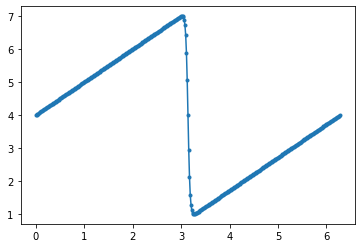

In [6]:
plt.plot(x, u, '.-')
print ("Integral = ",u.sum()-4.0*len(x))

Integral =  -757.2375099532064


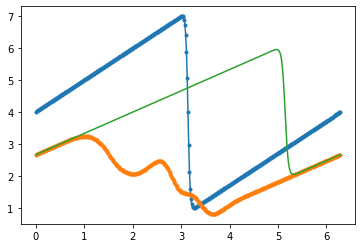

In [7]:
plt.plot(x, u, '.-')

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
        u[i] = un[i] - dt/dx*un[i]*(un[i]-un[i-1]) + viscosity * dt / dx**2 * (un[i+1] - 2.0*un[i] + un[i-1])
    u[0] = un[0] - dt/dx*un[0]*(un[0]-un[-2]) + viscosity * dt / dx**2 * (un[1] - 2.0*un[0] + un[-2])
    u[-1] = un[0]
    
plt.plot(x, u, '.-')
print ("Integral = ",u.sum()-4.0*len(x))
plt.plot(x, u_analytical, label='Analytical')